In [61]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import sys
sys.path.append('..')
import os
import random

In [62]:
from similarity.idk_dist.IDK2 import *

In [63]:
def find_subdirectory(target_subdir, parent_dir):

    """
       target_subdir: The file that you are looking for
       parent_dir: The Directory where you want to search

       returns
       dataset_dir: This is all the directories inside parent_dir that have the file target_subdir
    """

    target_dir = []
    target_dir.append(target_subdir)
    dataset_dir = []
        
    for root, dirs, files in os.walk(parent_dir):
            
        if target_dir == files:
                
            dataset_dir.append(os.path.join(root, target_subdir))
        
    return dataset_dir

In [77]:
parent_dir = f'../all_approx/Version_2/'

dir1 = find_subdirectory('test.csv', parent_dir)
dir1.sort()
dir1

['../all_approx/Version_2/approx_1/Approximation 1/test.csv',
 '../all_approx/Version_2/approx_2/Approximation 2/test.csv',
 '../all_approx/Version_2/approx_3/Approximation 2/test.csv',
 '../all_approx/Version_2/approx_4/Approximation 1/test.csv',
 '../all_approx/Version_2/approx_5/Approximation 2/test.csv',
 '../all_approx/Version_2/approx_6/Approximation6/test.csv',
 '../all_approx/Version_2/base-sine/base-sine/test.csv']

In [66]:
base_sine = dir1[-1]

df = pd.read_csv(base_sine)
base_np = df['value-0'].values.reshape(-1, 1)

In [67]:
ts_list = []
ts_np = []

for i in range(500):

    ts_np.append(base_np)

for dir in dir1:
    df = pd.read_csv(dir)
    a = df['value-0'].values.reshape(-1, 1)
    ts_list.append(df)
    ts_np.append(a)

In [68]:
random.shuffle(ts_np)

In [73]:
idk_score = idk_square(ts_np, psi1=16,psi2=4, t1=500, t2=500)

In [74]:
idk_score

array([1.18343195e-05, 9.98027613e-01, 9.98027613e-01, 9.98027613e-01,
       9.98027613e-01, 9.98027613e-01, 9.98027613e-01, 9.98027613e-01,
       9.98027613e-01, 9.98027613e-01, 9.98027613e-01, 9.98027613e-01,
       9.98027613e-01, 9.98027613e-01, 9.98027613e-01, 9.98027613e-01,
       9.98027613e-01, 9.98027613e-01, 9.98027613e-01, 9.98027613e-01,
       9.98027613e-01, 9.98027613e-01, 9.98027613e-01, 9.98027613e-01,
       9.98027613e-01, 9.98027613e-01, 9.98027613e-01, 9.98027613e-01,
       9.98027613e-01, 9.98027613e-01, 9.98027613e-01, 9.98027613e-01,
       9.98027613e-01, 9.98027613e-01, 9.98027613e-01, 9.98027613e-01,
       9.98027613e-01, 9.98027613e-01, 9.98027613e-01, 9.98027613e-01,
       9.98027613e-01, 9.98027613e-01, 9.98027613e-01, 9.98027613e-01,
       9.98027613e-01, 9.98027613e-01, 9.98027613e-01, 9.98027613e-01,
       9.98027613e-01, 9.98027613e-01, 9.98027613e-01, 9.98027613e-01,
       9.98027613e-01, 9.98027613e-01, 9.98027613e-01, 9.98027613e-01,
      

In [75]:
idk_score = np.append(idk_score, 0.2)

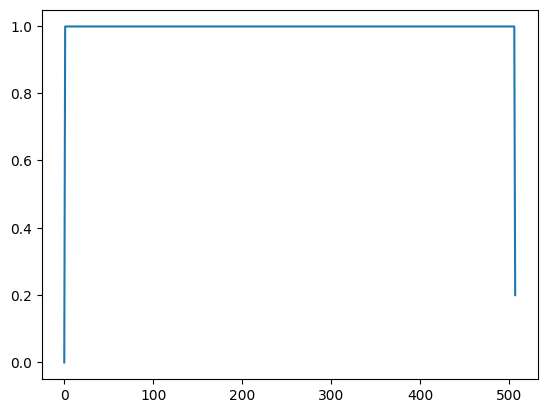

In [76]:
plt.plot(idk_score)
plt.show()

In [ ]:
def plotter(df: pd.DataFrame, title: str):

    plt.figure(figsize=(20, 8))
    
    plt.plot(df['timestamp'], df['value-0'], label='Plot')
    plt.xlabel('Time Stamp')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.show()

In [ ]:
def plotter_np(data: np.array, title: str):

    plt.figure(figsize=(20, 8))

    plt.plot(data)
    plt.title(title)
    plt.show()

In [ ]:
for i, data in enumerate(ts_list):

    plotter(data, title=f'Figure {i+1}')

In [ ]:
for i, data in enumerate(ts_np):

    plotter_np(data, title=f'Figure {i+1}')